# Aprendizaje Supervisado, Hill climbing y playground de Tensorflow

Dalia Camacho

## Aprendizaje Supervisado utilizando el perceptrón sobre un conjunto linealmente separable

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
random.seed(a=54553)

Definimos un conjunto linealmente separable en dos dimensiones a partir de la recta $x_2=8-\frac{1}{4}x_1$, es decir:

\begin{equation}
Y = 
\begin{cases}
1 & 8 - \frac{1}{4} x_1 - x_2 < 0\\
0 & e.o.c
\end{cases}
\end{equation}

Generamos puntos $(x_1,x_2)$ y les asignamos el valor esperado de $Y$.

In [2]:
npoints = 250

mat = np.zeros((npoints,3))

for i  in range(0, npoints-1):
    mat[i,0]=random.uniform(0,32);
    mat[i,1]=random.uniform(0,32);
    aux = 8 - 1/4*mat[i,0]- mat[i,1]
    if(aux<0):
        mat[i,2]=1.0;
        

Graficamos los puntos obtenidos, el color claro son los puntos para los que dispara la neurona $Y$, los obscuros son los puntos para los que no hay disparo. La línea punteada es la línea a partir de la cual se definieron los dos conjuntos linealmente separables.

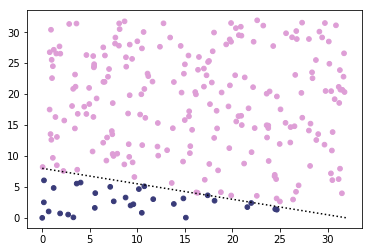

In [3]:
color = [str(item) for item in mat[:,2]];
plt.scatter(mat[:,0],mat[:,1], s=22, c=color, cmap="tab20b");
plt.plot([0,32], [8,0], "k", linestyle=":");

Definimos los valores iniciales, $w_1$, $w_2$, la tasa de aprendizaje $k$ y el umbral de disparo $\theta$ 

In [4]:
k        = 0.001;  # Tasa de aprendizaje
theta    = 8;      # Threshhold
w1       = 1;      # Peso inicial de la variable x
w2       = 1;      # Peso inicial de la variable y
maxloops = 10000;  # Número máximo de iteraciones


Definimos la función $Yfun$ que determina si hay o no disparo de la neurona $Y$ dados $x_1$, $x_2$, $w_1$, $w_2$ y $\theta$

In [5]:
def Yfun(x1, x2, w1, w2, thresh):
    return np.where(thresh < w1*x1 + w2*x2 ,1.0,0.0)

Generamos un código que evalúa cada uno de los puntos y dependiendo del error o acierto, se modifica el valor de $w_1$ y de $w_2$ a partir de la relación: $\Delta w_i= k\cdot(Y-y)\cdot x_i$. De esta forma obtenemos valores $w_1$ y $w_2$ con los que se logra separar ambos conjuntos de forma lineal.

In [6]:
loops = 0;
cond  = False
while loops < maxloops and cond == False:
    cond = True;
    for i in range(0,npoints):
        loops    = loops +1;
        yi       = Yfun(mat[i,0], mat[i,1], w1, w2,theta);
        aux      = (mat[i,2]-yi);
        if aux  != 0.0:
            cond = False;
            w1   = w1 + k*(mat[i,2]-yi)*mat[i,0];
            w2   = w2 + k*(mat[i,2]-yi)*mat[i,1];
print("w1 =", w1)
print("w2 =", w2)

w1 = 0.2476527815887279
w2 = 0.9890167255095208


Ahora graficamos la recta dada por $w_1$ y $w_2$ obtenidos (línea roja), mientras que la línea puteada representa la recta que generó los valores observados $(x_1,x_2)$.

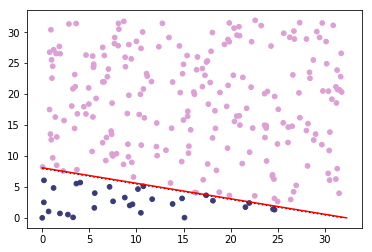

In [7]:
color = [str(item) for item in mat[:,2]];
plt.scatter(mat[:,0],mat[:,1], s=22, c=color, cmap="tab20b");
plt.plot([0,32], [8,0], "k", linestyle=":");
plt.plot([0,8/w1], [8/w2,0], "r");

## Hill Climbing aleatorio

El problema de hill climbing consiste en llegar a un punto donde se alcance el máximo de una función de score, en un plano de dos dimensiones. Resolver el problema de forma aleatoria consiste en elegir una dirección inicial aleatoriamente, si la dirección mejora el score se avanza nuevamente en esa dirección. A continuación hacemos una simulación de hill climbing aleatorio.


Primero definimos las funciones **dist** y **zfun**. La función **dist** se utiliza para encontrar la distancia entre el punto al tiempo $t$ y el punto al que deseamos llegar. La función **zfun** es el inverso de la distancia y se utiliza como el score, por lo que si $zfun(t)>zfun(t-1)$ nos encontramos más cerca de llegar a nuestro objetivo. Las funciones **dist** y **zfun** se utilizan también para el hill climbing con pesos.

In [8]:

def dist(x_r,y_r,x_t,y_t):
    return np.sqrt((x_t-x_r)**2 + (y_t-y_r)**2);

def zfun(x_r,y_r,x_t,y_t):
    return 1/dist(x_r,y_r,x_t,y_t);


La función **randomDir** define la dirección que se debe tomar, esto se hace de forma aleatoria y se elige de tal forma que la norma del paso sea uno.

In [9]:

def randomDir():
    randDir = np.array([random.randint(-1,1),random.randint(-1,1)]);
    while randDir[0]==0 and randDir[1]==0:
        randDir = np.array([random.randint(-1,1),random.randint(-1,1)]);

    if randDir[0]!=0 and randDir[1]!=0:
        randDir = randDir/np.sqrt((randDir[0]**2 + randDir[1]**2));
    return randDir

Elegimos un punto inicial $\big(x_r(0), y_r(0)\big)$ y el punto al que deseamos llegar $(x_t,y_t)$.

In [10]:
random.seed(a=68644)
x_r = random.uniform(0,1);
y_r = random.uniform(0,1);

x_t = random.uniform(0,1);
y_t = random.uniform(0,1);


Definimos el tamaño de paso, la dirección inicial en la que nos vamos a mover, el valor inicial de **zfun**, el número máximo de pasos y el score mínimo al que se debe llegar para decir que estamos lo suficientemente cerca de nuestro objetivo.

In [11]:
step     = 0.005;
direc    = randomDir();
Xvec     = np.array([x_r]);
Yvec     = np.array([y_r]);
z0       = zfun(x_r,y_r,x_t,y_t);
zmax     = 1000;
maxsteps = 10000;

Finalmente corremos la simulación del hill climbing.

In [12]:
steps = 0; # Pasos al tiempo 0
while steps < maxsteps and z0<zmax:
    
    x_r  = x_r + step * direc[0]; # Posición horizontal al tiempo t+1
    y_r  = y_r + step * direc[1]; # Posición vertical al tiempo t+1
    Xvec = np.append(Xvec,x_r);   # Vector de trayectoria horizontal.
    Yvec = np.append(Yvec,y_r);   # Vector de trayectoria vertical
    z1   = zfun(x_r,y_r,x_t,y_t); # Evaluamos el score en el nuevo punto
    
    # Definimos la dirección según el score de zfun
    if z1 < z0:
        direc = randomDir(); 
    steps = steps + 1; 
    # Actualizamos z0, el valor previo de zfun
    z0 = z1;

z0_aleatorio = z0;

In [13]:
print("Pasos = ", steps, "\t Score = ", round(z0,2), "\t Distancia = ", round(1/z0,4))

Pasos =  397 	 Score =  1528.01 	 Distancia =  0.0007


## Hill Climbing con puntos cardinales

Resolver el problema hill climbing con información adicional sobre los puntos cardinales consiste en aprender hacia dónde se debe dirigir a partir de la cercanía a los puntos cardinales, no solamente la cercanía hacia el objetivo.

En este caso se tiene una red con cuatro neuronas que reciben información de los cuatro puntos cardinales. Si una neurona dispara, entonces el punto cardinal al que corresponde será elegido para aproximarse hacia este en el siguiente paso. Es posible elegir dos direcciones, siempre y cuando estas no se anulen. 

La dirección elegida se determina a partir de la distancia a puntos cardinales y pesos $w_{j,i}$. Los pesos $w_{j,i}$ se actualizan dependiendo de si uno se acercó o alejó del objetivo. Esto se hace de la siguiente forma $\Delta w_{j,i}=c\cdot [z(t+1)-z(t)]\cdot Y_j(t)\cdot X_i(t)$. 
Donde $X_i$ corresponde a la cercanía del punto cardinal $X_i$ y $Y_j$ corresponde a la presencia o ausencia de disparo de la neurona $Y_j$ y $c$ es la tasa de aprendizaje.



Definimos los parámetros iniciales, salvo la tasa de aprendizaje $c$, estos son los mismos que en el caso aleatorio.

In [14]:
x_r2     = Xvec[0];
y_r2     = Yvec[0];
Xvec2    = np.array([x_r2]);
Yvec2    = np.array([y_r2]);
z0       = zfun(x_r2,y_r2,x_t,y_t);
c        = 1.5;

Definimos la cercanía del punto inicial a los puntos cardinales con **zfun** y obtenemos así el valor de $X_i$. Definimos los pesos $w_{j,i}$ de tal forma que si se está cerca de uno de los puntos cardinales sea más difícil que éste sea la dirección a tomar. 

In [15]:
N0 = zfun(x_r2,y_r2, 0,1);
S0 = zfun(x_r2,y_r2, 0,-1);
E0 = zfun(x_r2,y_r2, 1,0);
W0 = zfun(x_r2,y_r2, -1,0);

x  = np.array([N0,S0,E0,W0]);

wN = np.array([-1,0,0,0]);
wS = np.array([0,-1,0,0]);
wE = np.array([0,0,-1,0]);
wW = np.array([0,0,0,-1]);


Definimos la función **Yfun2** con la que se define que neuronas $Y_i$ disparan, esto depende de $X$, de los pesos $w_{j,i}$ y de un ruido adicional producido por una distribución normal con media cero. Además definimos **direc2** que define la dirección a seguir a partir del resultado de **Yfun2**.

In [16]:
def Yfun2(x,wN,wS, wE, wW,z0):
    var = max(1/z0,0.4);
    aux = np.array([x.dot(wN), x.dot(wS), x.dot(wE),x.dot(wW)]);
    aux = aux + np.random.normal(0,var,4);
    aux = np.where(aux>0,1,0);
    while (aux[0]-aux[1]+3*aux[2]-3*aux[3])==0 or np.sum(aux)>=3:
        aux = aux + np.random.normal(0,var,4);
        aux = np.where(aux>0,1,0);
    return aux

def direc2(Y):
    aux = np.array([Y[2]-Y[3], Y[0]-Y[1]]);
    if aux[0]!=0 and aux[1]!=0:
        aux = aux/np.sqrt((aux[0]**2 + aux[1]**2));
    return aux

Ahora hacemos una simulación de este proceso de hill climbing.

In [17]:
steps2 = 0;
while steps2 < maxsteps and z0<zmax:
    # Se define qué neuronas disparan
    Y      = Yfun2(x,wN,wS, wE, wW,z0);
    direc  = direc2(Y);
    # Se actualiza la posición actual
    x_r2   = x_r2 + step * direc[0];
    y_r2   = y_r2 + step * direc[1];
    # Se guarda la trayectoria
    Xvec2  = np.append(Xvec2,x_r2);
    Yvec2  = np.append(Yvec2,y_r2);
    # Se obtiene el score en el nuevo punto
    z1     = zfun(x_r2,y_r2,x_t,y_t);
    # Se actualizan los pesos
    aux2   = c*(z1-z0);
    wN     = wN + aux2*Y[0]*x;
    wN     = wN/np.sum(abs(wN));
    wS     = wS + aux2*Y[1]*x;
    wS     = wS/np.sum(abs(wS));
    wE     = wE + aux2*Y[2]*x;
    wE     = wE/np.sum(abs(wE));
    wW     = wW + aux2*Y[3]*x;
    wW     = wW/np.sum(abs(wW));    
    # Se actualiza la distancia a los puntos cardinales
    N0     = zfun(x_r2,y_r2, 0,1);
    S0     = zfun(x_r2,y_r2, 0,-1);
    E0     = zfun(x_r2,y_r2, 1,0);
    W0     = zfun(x_r2,y_r2, -1,0);
    x      = np.array([N0,S0,E0,W0]);  
    # Se actualiza z0
    z0     = z1;
    steps2 = steps2 + 1; 
    


In [18]:
print("Pasos = ", steps2, "\t Score = ", round(z0,2), "\t Distancia = ", round(1/z0,4))

Pasos =  252 	 Score =  1411.74 	 Distancia =  0.0007


## Comparación entre hill climbing aleatorio y con pesos

Ahora comparamos ambos enfoques:

In [19]:
print("Método\t\t Pasos \t Score \t \t Distancia \n",
    "Aleatorio  \t", steps, "\t", 
      round(z0_aleatorio,2), "\t", round(1/z0_aleatorio,4), "\n",
      "Pesos\t \t", steps2, "\t", 
      round(z0,2), "\t", round(1/z0,4))

Método		 Pasos 	 Score 	 	 Distancia 
 Aleatorio  	 397 	 1528.01 	 0.0007 
 Pesos	 	 252 	 1411.74 	 0.0007


Ahora graficamos las trayectorias en cada caso.

In [ ]:

fig = plt.figure();
axi = fig.add_axes([0.0, 0.4, 0.8, 0.4],
                ylim=(min(min(Yvec),min(Yvec2))-0.05, 
                      max(max(Yvec),max(Yvec2))+0.05));
axi.plot(Xvec,Yvec, c="k");
axi.scatter(x_t, y_t, c="g", s=400.);
axi.scatter(Xvec[0], Yvec[0],c="b", s=100.);
plt.title('Aleatorio', fontsize=20);

axj = fig.add_axes([0.9, 0.4, 0.8, 0.4],
                ylim=(min(min(Yvec),min(Yvec2))-0.05, 
                      max(max(Yvec),max(Yvec2))+0.05), yticklabels=[]);  
axj.plot(Xvec2,Yvec2, c="k");
axj.scatter(x_t, y_t,c="g", s=500.);
axj.scatter(Xvec2[0], Yvec2[0],c="b", s=100.);
plt.title('Pesos', fontsize=20);



 

## Resultados de mover parámetros en el playground de Tensorflow

El playground de tensorflow cuenta con cuatro conjuntos de datos para problemas de clasificación, una variable que agrega ruido a los datos, tasa de aprendizaje, regularización (L1 y L2), tasa de regularización y cuatro funciones de activación (ReLU, tanh, sigmoid y lineal). Además se puede definir la arquitectura de la red que mejor resuelve cada problema, se pueden agregar capas ocultas y el input puede ser lineal en términos de $x_1$ y $x_2$, cuadrático o transformadas bajo la función seno.

Para el conjunto de dos círculos concéntricos basta con el input de $x_1$ y $x_2$ y una capa oculta con tres neuronas, siempre y cuando la función de activación no sea lineal. Valores bajos en la tasa de aprendizaje tardan en clasificar los conjuntos. Una tasa de aprendizaje muy grande funciona sólo con activación sigmoide, pero da mejores resultados con tasa de aprendizaje de uno. Con activación ReLU se tiene un conjunto central en forma de hexágono, con tanh un conjunto triangular, con sigmoide un conjunto central triangular con las esquinas suavizadas y se estabiliza más rápidamente. Al agregar regularización y un parámetro alto de regularización no se logra clasificar los dos conjuntos, especialmente bajo regularización L1.

Si se utilizan los inputs al cuadrado, incluso la activación lineal funciona rápidamente y con una capa oculta con una sola neurona. Si agregamos regularización no se logra estabilizar la clasificación. 

Es importante considerar la forma del conjunto de datos a la hora de definir la arquitectura, ya que si el input inicial está relacionado con los datos observados, la arquitectura requerida es más simple. 